importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


importing dataset

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


data analysis(EDA,data cleaning,manipulation)

In [ ]:
df.info() # data is cleaned here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#assigning features and target
temperature is feature ,target is revenue

In [ ]:
x=np.array(df['Temperature']).reshape(-1,1)
y=np.array(df['Revenue']).reshape(-1,1)

splitting the data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=0)#only 5 percent for testing

In [ ]:
df.tail()#total 500 data points

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


choosing the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor(n_estimators=10,random_state=0)

training/fitting model

In [ ]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
regressor.fit(x_train,y_train).get_params()#this data useful for hyper parameter tuning

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

testing the model

In [ ]:
y_pred=regressor.predict(x_test).reshape(-1,1)

In [ ]:
target=pd.DataFrame({'actual':y_test.reshape(-1),'predicted':y_pred.reshape(-1)})

In [ ]:
target.head()

,actual,predicted
0,704.281439,689.620045
1,632.901914,643.466732
2,662.558990,672.142273
3,449.813300,469.136043
4,636.298374,664.304021


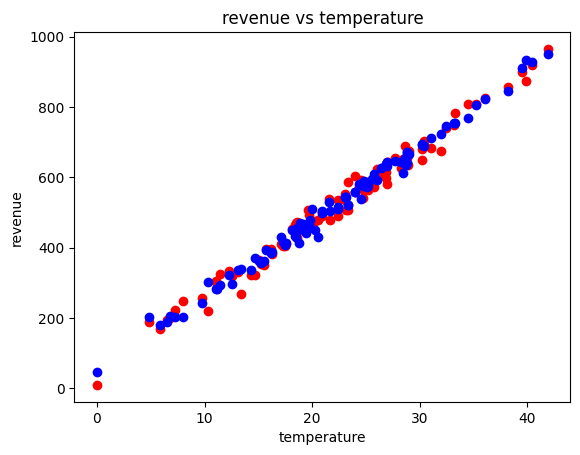

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.scatter(x_test,y_pred,color='blue')
plt.title('revenue vs temperature')
plt.xlabel('temperature')
plt.ylabel('revenue')
plt.show()


<Axes: >

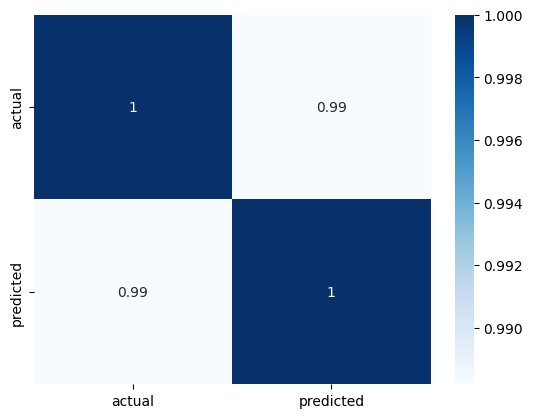

In [ ]:
sns.heatmap(target.corr(),annot=True,cmap='Blues') # strong positive correlation nearer to 1 0.99 is

In [ ]:
r2_score(y_test,y_pred)#accuracy is 97% so this model is giving high accuracy i.e""good model"

0.9761922419332469

same problem statement , using random forest but increasing the accuracy that is doing
# hyper parameter tuning

In [26]:
df1=pd.read_csv('https://raw.githubusercontent.com/sahilrahmann/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/cardekho_data.csv')

In [27]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


EDA (data exploration,manipulatin,cleaning,visualization)i.e data analysis

In [30]:

df1.shape

(301, 9)

In [31]:
df1.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [32]:
df1.Seller_Type.unique()

array(['Dealer', 'Individual'], dtype=object)

In [35]:
df1.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [36]:
df1.Owner.unique()

array([0, 1, 3])

In [38]:
df1.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [39]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [40]:
df1.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [41]:
df1['current_year']=2024

In [43]:
df1['no_year']=df1['current_year']-df1['Year']

In [44]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [45]:
df1.drop(['Year','current_year','Year'],axis=1,inplace=True)

In [46]:
df1.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [47]:
df.head()

,Temperature,Revenue,no_year
0,24.566884,534.799028,10.0
1,26.005191,625.190122,11.0
2,27.790554,660.632289,7.0
3,20.595335,487.706960,13.0
4,11.503498,316.240194,10.0


In [48]:
new=pd.get_dummies(df1)

In [49]:
new.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [50]:
df1=pd.get_dummies(df1)
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [51]:
df1.shape

(301, 110)

In [54]:
5363-3214-215

1934

In [55]:
df1.drop(['Fuel_Type_CNG','Transmission_Automatic','Seller_Type_Dealer'],axis=1,inplace=True)

In [56]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,4.75,9.54,43000,0,11,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2.85,4.15,5200,0,13,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,4.60,6.87,42450,0,10,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True


<Axes: >

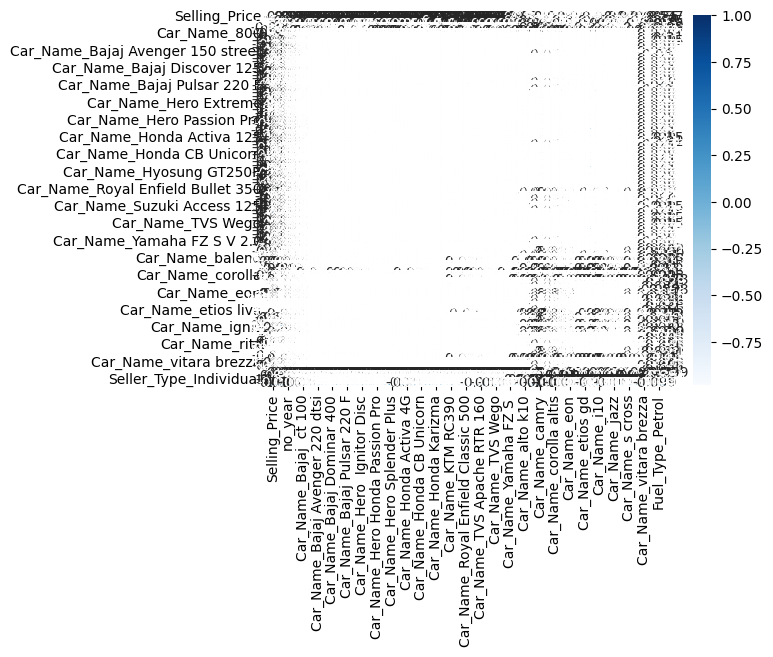

In [57]:
sns.heatmap(df1.corr(),annot=True,cmap='Blues')

In [71]:
x=df1.drop(['Selling_Price'],axis=1)
y=df1['Selling_Price']

# to know feature importance

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

In [73]:
model=ExtraTreesRegressor()
feature_imp=model.fit(x,y)

In [74]:
feature_imp.feature_importances_

array([3.25964241e-01, 3.02090079e-02, 5.39892325e-04, 7.26917244e-02,
       2.95020668e-05, 1.68734868e-07, 4.55982881e-07, 3.49019002e-06,
       1.65168296e-06, 2.18533453e-07, 9.24697607e-06, 1.06640594e-06,
       2.49799393e-07, 1.08546178e-07, 2.62442119e-07, 8.85973070e-06,
       1.91087928e-06, 3.34196513e-07, 5.69483878e-06, 3.61158473e-06,
       2.73027699e-06, 2.28693016e-06, 1.21396819e-06, 1.23535777e-06,
       5.97284477e-06, 5.07644674e-07, 9.25894024e-07, 3.77350652e-07,
       3.37537027e-07, 3.13958564e-09, 9.10321778e-07, 1.05288645e-06,
       2.46396032e-08, 7.07481969e-08, 7.66818007e-07, 1.15153980e-08,
       2.63147129e-06, 8.17868709e-07, 1.16974569e-06, 1.46284236e-06,
       1.01076996e-06, 2.23732799e-05, 3.31943737e-09, 1.29160652e-05,
       1.35422307e-05, 1.62231096e-06, 1.26714186e-05, 1.56889770e-05,
       4.80490313e-06, 4.66039467e-06, 1.04339736e-04, 1.94643173e-05,
       5.38121604e-05, 2.36055781e-05, 1.83037492e-07, 3.92485397e-06,
      

<Axes: >

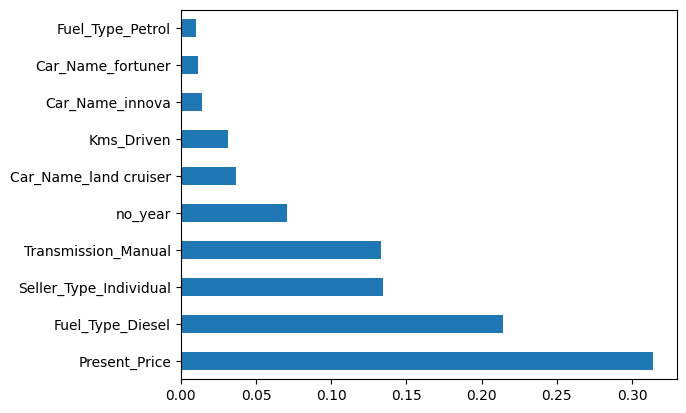

In [77]:
# Fit the model and store the fitted model in the feature_imp variable
feature_imp = model.fit(x,y)

# Create a pandas Series with the feature importances and the column names from df1
imp = pd.Series(feature_imp.feature_importances_, index=x.columns)

# Plot the 10 largest feature importances
imp.nlargest(10).plot(kind='barh')

splitting data

In [78]:
# this tells that present_price has highest importance that impacts the target value selling price
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

choosing a model

In [80]:
regressor=RandomForestRegressor()

# hyper parameter tuning

In [81]:
# to find out best parameters
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [82]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [83]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
regressor=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=0,n_jobs=1)

In [86]:
regressor.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   2.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   4.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_est

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [87]:
regressor.best_params_#n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
# max_features=['auto','sqrt']
# max_depth=[int(x) for x in np.linspace(5,30,num=6)]
# min_samples_split=[2,5,10,15,100]
# min_samples_leaf=[1,2,5,10]

{'n_estimators': 800,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

In [88]:
y_pred=regressor.predict(x_test)

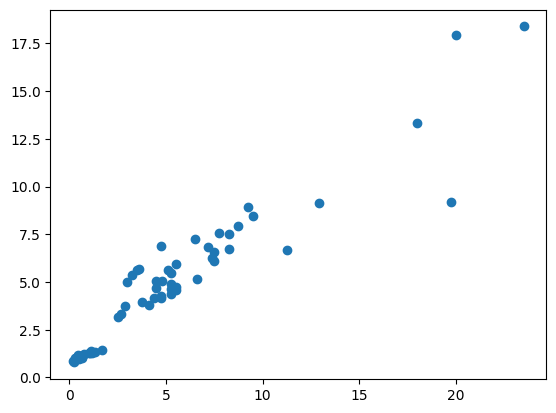

In [89]:
plt.scatter(y_test,y_pred)

In [90]:
final_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [91]:
final_df.head()

,actual,predicted
223,8.25,6.749717
150,0.50,1.044410
226,5.25,4.636091
296,9.50,8.455848
52,18.00,13.351314


<Axes: >

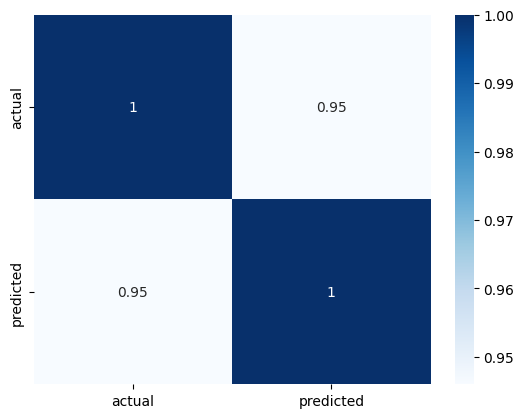

In [92]:
sns.heatmap(final_df.corr(),annot=True,cmap='Blues')# strong positive correlation

performance/accuracy

In [93]:
r2_score(y_test,y_pred)

0.8429110173625559

In [ ]:
# here the accuracy got decreased aftr hyper param tuning cuz we didnt do for all parameters ,else after doing hyper parameter tuning the model's accuracy will get increased
# in this file why the r2_score accuracy got decreased after hyper parameter tuning? it should actually increased right?

# Gemini
# You are right. Hyperparameter tuning should increase the accuracy of a model.

# In this case, the accuracy decreased after hyperparameter tuning because the tuning was not done for all parameters. If you were to perform tuning for all the parameters, the accuracy of the model would likely increase.



In [94]:
# Define the parameter grid with all parameters
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
}


In [102]:
# Create a RandomizedSearchCV object
regressor = RandomizedSearchCV(
    estimator=RandomForestRegressor(), # Changed to RandomForestRegressor()
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=100,
    cv=5,
    verbose=2,
    random_state=0,
    n_jobs=1
)

In [103]:
regressor.fit(x_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=auto, max_leaf_nodes=40, min_impurity_decrease=0.5, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=auto, max_leaf_nodes=40, min_impurity_decrease=0.5, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=auto, max_leaf_nodes=40, min_impurity_decrease=0.5, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, criterion=poisson, max_depth=10, max_features=auto, max_leaf_nodes=40, min_impurity_decrease=0.5, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=400; total time=   0.0s
[CV] END 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
260 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
260 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50],
                                        'min_impurity_decrease': [0.0, 0.1, 0.2,
                                                                  0.3, 0.4,
                                                                  0.5],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [104]:
print(regressor.best_params_)



{'n_estimators': 600, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.3, 'max_leaf_nodes': 30, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'friedman_mse', 'bootstrap': True}


In [105]:
# Predict the target variable using the best model
y_pred = regressor.predict(x_test)



In [106]:
# Evaluate the model
print(r2_score(y_test, y_pred))


0.8715303137783241


In [ ]:
# more fine tuning required....